## TF-IDF 기반 스팸분석 (문서상 단어의 빈도로 분석하는 기법)
    * 사용모델 : 싸이킷런(sklearn) - LogisticRegression
    * Featue : 형태소에서 추출된 단어별 빈도
    * 분석 목표(예측값) : 스펨 메일 판별
    * 데이터 출처 : https://https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [4]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## SMSSpamCollection 을 먼저 살펴본다

In [5]:
spam_header = 'spam\t'
no_spam_header = 'ham\t'
documents = []
labels = []

In [9]:
with open('SMSSpamCollection', 'r', encoding = 'UTF8') as file_handle:
    for line in file_handle:
        # 각 줄에서 레이블 부분만 떼어내고 나머지를 documents에 넣는다.
        if line.startswith(spam_header):
            labels.append(1)
            documents.append(line[len(spam_header):])
        elif line.startswith(no_spam_header):
            labels.append(0)
            documents.append(line[len(no_spam_header):])

In [10]:
labels[:5]

[0, 0, 1, 0, 0]

In [11]:
documents[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'Ok lar... Joking wif u oni...\n',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'U dun say so early hor... U c already then say...\n',
 "Nah I don't think he goes to usf, he lives around here though\n"]

## TF_IDF
 * Term Frequency(빈도) x Inverse Document Frequency (문서빈도)
 * 문서는 단어러 주어져 있으며 각단어가 문서상의 어떠한 연관성이 있는지 빈도기반 수치로 표현

### TF(Term Frequency)
 * 가설 : 중요한 단어는 문서상에 많이 출현한다.
 * 단어가 문서상에 얼마나 출현했는지 수치로 표현 (개별단어) / (문서상의 전체 단어)

### 위 문장에서 의미상으로 가장 중요한 단어는 friend
 * 그렇지만 빈도수를 기준으로는 a도 TF스코어가 높게 나온다.

## IDF(Inverse Document Frequency)
 * 공식 Log(Total# of Docs / # of Docs with the term in it)
    - Log(총 문장의 갯수 / 해당 단어가 문장에 출현한 갯수)
 * 해석 : 자주 등장하는 단어에 패널티를 부과 (a, is, of, that 등)

# 키워드 분석 (한글 형태소 분석)

## OKT

In [18]:
from konlpy.tag import Okt
okt = Okt()
malist = okt.pos("아버지가 방에 들어가신다.", norm = True, stem = True)
# stem 옵션: 어근으로 분석하는 옵션
print(malist)

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


## 주요 어휘 분석

In [19]:
import codecs
from konlpy.tag import Okt
# utf-8 인코딩으로 파일을 열고 글자 출력하기
fp = codecs.open("문재인_국정연설문_2017.txt","r",encoding = "utf-8")
text = fp.read()
# 텍스트를 한 줄씩 처리하기
otk = Okt()
word_dic = {}
lines = text.split("\r\n")

In [20]:
for line in lines:
    malist = okt.pos(line,norm = True, stem = True)
    for word in malist:
        if word[1] == "Noun": # 단어 성분이 명사인 단어라면
            if not (word[0] in word_dic): # 단어 딕셔너리에 단어가 없다면
                word_dic[word[0]] = 0 # 첫번째로 들어가는 단어이므로 0
            word_dic[word[0]] += 1 # 첫번째로 들어가는 단어가 아니므로 +1
# 많이 사용된 명사 출력하기
keys = sorted(word_dic.items(), key = lambda x:x[1], reverse = True)

for word, count in keys:
    print("{0}({1})".format(word,count))
print()

일자리(44)
것(35)
청년(31)
수(28)
국민(24)
예산(22)
정부(19)
추경(16)
국회(15)
우리(13)
소득(13)
여러분(12)
더(11)
일(11)
고용(10)
계층(10)
등(9)
이번(9)
창업(9)
민간(8)
그(7)
취업(7)
국가(7)
중소기업(7)
위(7)
민생(7)
지원(7)
배정(7)
의원(6)
편성(6)
노력(6)
부모(6)
상황(6)
경제(6)
명(6)
세대(6)
효과(6)
부문(6)
사업(6)
안전(6)
서비스(6)
치매(6)
존경(5)
이(5)
지난(5)
저(5)
모든(5)
개(5)
확대(5)
성장(5)
개선(5)
올해(5)
협력(5)
창(5)
어린이집(5)
어르신(5)
때(4)
바로(4)
내용(4)
가장(4)
인력(4)
위해(4)
삶(4)
지금(4)
모두(4)
다시(4)
실업률(4)
실업(4)
정도(4)
지속(4)
중심(4)
문제(4)
우선(4)
취약(4)
생활(4)
두(4)
교사(4)
신설(4)
추가(4)
지역(4)
연설(3)
활동(3)
마음(3)
안(3)
이유(3)
직접(3)
배(3)
말(3)
계속(3)
정치(3)
사실(3)
이후(3)
최고(3)
기록(3)
가운데(3)
대책(3)
재난(3)
수준(3)
격차(3)
사람(3)
사회(3)
생각(3)
전환(3)
해결(3)
대응(3)
규모(3)
정책(3)
먼저(3)
시작(3)
안정(3)
서민(3)
육아휴직(3)
국(3)
공립(3)
복지(3)
동시(3)
충(3)
공무원(3)
노인(3)
제도(3)
채용(3)
구직(3)
조금(3)
월(3)
이야기(3)
여성(3)
아이(3)
설치(3)
센터(3)
미세먼지(3)
전국(3)
자리(2)
동료(2)
설명(2)
역대(2)
시기(2)
시정(2)
이자(2)
주목(2)
절박(2)
공부(2)
준비(2)
번(2)
이제(2)
오히려(2)
마지막(2)
다음(2)
보도(2)
가슴(2)
의원님(2)
소방관(2)
가지(2)
집배원(2)
끝(2)
하루(2)
책임(2)
일이(2)
바(2)
대선(2)
과제(2)
사용(2)
기준(2)
통계(2)
월간(2)
에코(

## 불용어 리스트 확보
 * 불용어 : 분석에 사용하지 않아 제외하는 단어

In [21]:
stop_words = "것 수 더 등 그 위 명 이 저 개 창 때 바로 내용 가장 위해 안 배 말 이후 국 충 번 바 속 총 관 그게 분 협 몇 생 전 임 데 치 를 창 개"
stop_words = stop_words.split()
stop_words[:15]

['것', '수', '더', '등', '그', '위', '명', '이', '저', '개', '창', '때', '바로', '내용', '가장']

---

# Word2Vec
 * 문장 내부의 단어를 단어간 유사도 분석을 위해 수치 형태의 벡터로 인코딩 하는 신경망

### 단어 인코딩이란?
 *thank you love you               unique word : thank, you ,love
 *                                 encoding  :    0   ,  1  , 2
 * 하지만 단순 수치변환이나 원핫 인코딩을 하게되면 단어간의 유사도를 판단할 수 없다. 

In [24]:
import codecs
from konlpy.tag import Twitter
from konlpy.tag import Okt
from gensim.models import word2vec 
# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp = codecs.open("박근혜_국정연설문_2016.txt", "r", encoding="utf-8")
# fp = codecs.open("문재인_국정연설문_2017.txt", "r", encoding="utf-8")
text = fp.read()
# 텍스트를 한 줄씩 처리하기 --- (※2)
# twitter = Twitter()
okt = Okt()
results = []
lines = text.split("\r\n")
for line in lines:
    # 형태소 분석하기 --- (※3)
    # 단어의 기본형 사용
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)

    wakati_file = 'moon.wakati'

with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
# Word2Vec 모델 만들기 --- (※5)
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, window=10, hs=1, min_count=2, sg=1)

존경 하다 국민 여러분 국회의장 국회의원 여러분

저 오늘 북한 핵실험 미사일 발사 따르다 한반도 위기 고조 되다 있다 상황 국민 여러분 불안 위기 감 대해 정부 대처 방안 설명 드리다 국회 협력 동참 당부 드리다 이 자리 서다

북한 우리 정부 국제사회 거듭 되다 반대 경고 불구 새해 벽두 4 차 핵실험 감행 하다 한반도 물론 전 세계 평화 대한 기대 정면 도전 하다

특히 국제사회 규탄 제재 논의 되다 와중 또 다시 탄도 미사일 발사 추가 핵실험 미사일 발사 공언 있다 것 국제 사회 바라다 평화 그 들 원하다 않다 것 보여주다 극단 적 도발 행위 이다

만약 이대로 변화 없이 시간 흘러가다 브레이크 없이 폭주 있다 김정은 정권 핵 미사일 실전 배치 하다 되다 것 우리 두려움 공포 시달리다 되다 것 이다

그 동안 북한 수없이 도발 계속 하다 오다

최근 하다 2010년 천안함 폭침 46 명의 소중하다 우리 장병 목숨 빼앗다 연평도 포격 도발 우리 영토 직접 적 무력 공격 가하다 작년 8월 에도 DMZ 지뢰 포격 도발 일으키다 바 있다

북한 이러하다 도발 불구 우리 어떻 게 북한 변화 시키다 한반도 평화 정착 상생 남북관계 구축 하다 위해 지속 적 노력 기울이다 오다

저 국정 무게중심 한반도 평화 정착 통일기 반 구축 두다 더 이상 한반도 긴장 상황 일어나지 않다 하다 노력 다해 오다

정부 출범 초기 북한 핵 용납 하다 않다 도발 더욱 단호 하다 대응 하 되다 한편 남북 간 신뢰 구축 하다 위 ‘ 한반도 신뢰 프로세스 정책 기조 표방 하다

2014년 3월 에는 드레스덴 선언 발표 하다 민생 문화 환경 3 대다 통로 함께 열다 갈다 것 제안 하다

작년 8월 에는 남북 간 긴장 극도 달 상황 고위 당국 간 회담 열다 현안 해결 하다 위해 노력 하다

UNICEF WHO 등 국제 기구 382억원 과 민간 단체 사업 32억원 을 지원 하다 북한 취약 계층 대상 보건 의료 사업 펼치다 오다

작년 10월 에는 북한 요청 따르다 우리 전문가 들 금강산 방문 하

In [26]:
for line in lines:
    malist = okt.pos(line,norm=True, stem=True)
    for word in malist:
        if word[1] == "Noun": #  명사 확인하기 --- (※3)
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1 # 카운트하기
# 많이 사용된 명사 출력하기 --- (※4)
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

for word, count in keys:
    print("{0}({1}) ".format(word, count))
print()

것(89) 
우리(63) 
국민(53) 
북한(53) 
일자리(49) 
수(49) 
정부(38) 
청년(34) 
여러분(27) 
예산(22) 
더(20) 
그(20) 
도발(20) 
핵(19) 
국회(18) 
위해(18) 
지원(18) 
등(17) 
추경(16) 
위(16) 
노력(15) 
상황(15) 
이(14) 
지금(14) 
고용(14) 
일(14) 
국가(13) 
소득(13) 
미사일(13) 
이번(12) 
서비스(12) 
저(11) 
경제(11) 
계층(11) 
민간(11) 
협력(11) 
한반도(11) 
국제사회(11) 
존경(10) 
사업(10) 
민생(10) 
정권(10) 
때(9) 
지속(9) 
생각(9) 
창업(9) 
안전(9) 
제재(9) 
개성(9) 
산업(9) 
지난(8) 
가장(8) 
이제(8) 
모든(8) 
효과(8) 
이상(8) 
대해(8) 
의원(7) 
바로(7) 
취업(7) 
모두(7) 
이후(7) 
명(7) 
동안(7) 
중소기업(7) 
성장(7) 
세계(7) 
문제(7) 
통과(7) 
배정(7) 
힘(7) 
평화(7) 
의료(7) 
공단(7) 
앞(7) 
편성(6) 
직접(6) 
부모(6) 
인력(6) 
사실(6) 
다시(6) 
개(6) 
세대(6) 
대한(6) 
사회(6) 
대응(6) 
부문(6) 
우선(6) 
창(6) 
치매(6) 
지역(6) 
국회의원(6) 
대북(6) 
기업(6) 
부탁(6) 
자리(5) 
안(5) 
계속(5) 
삶(5) 
최고(5) 
때문(5) 
대책(5) 
확대(5) 
개선(5) 
올해(5) 
총(5) 
취약(5) 
생활(5) 
서민(5) 
어린이집(5) 
추가(5) 
당부(5) 
과정(5) 
어르신(5) 
주민(5) 
핵실험(5) 
발사(5) 
변화(5) 
작년(5) 
차원(5) 
위협(5) 
내부(5) 
유지(5) 
국회의장(4) 
내용(4) 
배(4) 
말(4) 
하루(4) 
바(4) 
실업률(4) 
실업(4) 
정도(4) 
최근(4) 
마련(4) 
수준(4) 
실효(4) 
중심(4) 
속(4

In [27]:
stop_words2 = "것 수 더 그 등 위 이 저 때 명 앞 다시 대해 이후 바로 이번 지난 이제 모든 모두 동안 대한 안 창 최고 때문 올해 총 추가 과정 작년 배 말 바 하루 정도 최근 마련 국 두 원 낼 결코 분 역대 시기 번 오히려 끝 먼저 최 충 동시 꼭 대체 달 명의 일도 또한 조금 월 해도 률 반드시 내 차 더욱 취 처음 오늘 해 반 현 "
stop_words2 = stop_words2.split()
stop_words2[:15]

['것', '수', '더', '그', '등', '위', '이', '저', '때', '명', '앞', '다시', '대해', '이후', '바로']

In [89]:
add_s = "제 들 하다 만들다 있다 드리다 되다 4 ‘  시키다 일부 이다 우리 없다 넘다 위해 함께 이상 경 진정하다 되어다 않다 주다"
add_s = add_s.split()
stop_words2 = stop_words2 + add_s
len(stop_words2)

268

In [90]:
from gensim.models import word2vec

# model  = word2vec.Word2Vec.load("hong.model")
# model  = word2vec.Word2Vec.load("park.model")
model  = word2vec.Word2Vec.load("moon.model")

# similar_words =model.wv.most_similar(positive=["북한"])
similar_words =model.wv.most_similar(positive=["일자리"])
for word_set in similar_words:
    print(f'{word_set[0]:<10}: {word_set[1]}')

돌보다       : 0.6907882690429688
살다        : 0.6802594661712646
일         : 0.6642703413963318
민간        : 0.663505494594574
효과        : 0.6540457010269165
공공        : 0.6361984014511108
‘         : 0.6360583901405334
기르다       : 0.6073493957519531
필요하다      : 0.6025323867797852
다시        : 0.5925571918487549


In [117]:
fp = codecs.open("박근혜_취임연설문.txt", "r", encoding="utf-8")
text = fp.read()
# 텍스트를 한 줄씩 처리하기 --- (※2)
# twitter = Twitter()
okt = Okt()
results = []
lines = text.split("\r\n")

for line in lines:
    # 형태소 분석하기 --- (※3)
    # 단어의 기본형 사용
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if (not word[1] in ["Josa", "Eomi", "Punctuation"]) and not word[0] in stop_words2:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)

    wakati_file = 'park.wakati'

존경 국민 여러분
700만 해외동포 여러분

대한민국 18 대다 대통령 취임 희망 새 시대 열다 각오 자리 서다

이렇다 막중 시대 적 소명 맡기다 국민 여러분 깊이 감사 자리 참석 해주다 이명박 대통령 전직 대통령 그리고 세계 각국 경축 사절 내외 귀빈 여러분 도 감사

대한민국 대통령 국민 여러분 뜻 부응 부흥 국민 행복 문화 융성 이루다

부강 국민 행복하다 대한민국 바치다

국민 여러분

대한민국 국민 노력 피 땀 룩

국민 강하다 의지 저력 산업화 민주화 이루다 위대하다 성취 역사

한강 기적 불리다 역사 독일 광산 열사 중동 사막 밤새 불 꺼지다 공장 연구실 그리고 영하 수십 도의 전방 전선 가족 조국 헌신 위대하다 국민 계시다 가능하다

대한민국 국민 진심 경의 표

존경 국민 여러분

격동 대사 속 수많다 고난 역경 극복 온 지금 글로벌 경제 위기 북한 핵 무장 위협 같다 안보 위기 이어지다

글로벌 금융위기 자본주의 역시 새롭다 도전 직면

도전 과거 달리 스스로 새롭다 길 개척 극복 나가다

새롭다 길 개척 쉬다 일
그러나 대한민국 국민 믿다
역 동 적 국민 강인하다 저력 믿다

자랑스럽다 국민 여러분 희망 새 시대 2 의 한강 기적 위대하다 도전 나서다

국민 개개인 행복 크기 국력 크기 국력 국민 향유 희망 새 시대 열다

경제 부흥

존경 국민 여러분

국가 발전 국민 행복 선 순환 하 새롭다 미래 만들기 나아가다 방향 제시

새 정부 경제 부흥 과 국민 행복 그리고 문화 융성 통해 새롭다 희망 시대 열다 갈다

첫째 부흥 이루다 창조경제 경제민주화 추진

세계 적 경제 패러다임 바뀌다

창조경제 과학기술 산업 융합 문화 산업 융합 산업 간 벽 허문 경계 선 창조 꽃 피우다

기존 시장 단순하다 확대 방식 벗어나다 융합 터전 새롭다 시장 새롭다 일자리

창조경제 중심 핵심 적 가치 두다 과학기술 IT 산업

과학기술 세계 적 수준 끌다 올리다
그리고 이러하다 과학기술 전 분야 적용 창조경제 구현

새 정부 미래창조과학부 같다 새롭다 패러

In [118]:
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
# Word2Vec 모델 만들기 --- (※5)
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, window=10, hs=1, min_count=2, sg=1)
model.save("park.model")
print("\n\n================= 분석 완료 ==================")



================= 분석 완료 ==================


In [119]:
model  = word2vec.Word2Vec.load("park.model")
similar_words =model.wv.most_similar(positive=["일자리"])
for word_set in similar_words:
    print(f'{word_set[0]:<10}: {word_set[1]}')

창조경제      : 0.2506895065307617
삶         : 0.21828627586364746
공정하다      : 0.2172025442123413
법         : 0.2062072455883026
땀         : 0.18839412927627563
기여        : 0.17840692400932312
새         : 0.1707451492547989
문화        : 0.1669514924287796
두다        : 0.16074880957603455
하나        : 0.1556221842765808


In [120]:
similar_words_list = []
for word_set in similar_words:
    similar_words_list.append(word_set[0])

In [121]:
similar_words_list

['창조경제', '삶', '공정하다', '법', '땀', '기여', '새', '문화', '두다', '하나']

In [134]:
import pandas as pd

In [129]:
f = open("박근혜_취임연설문.txt", 'r', encoding = 'utf-8')
lines = f.readlines()
f.close()

In [130]:
from konlpy.tag import Hannanum

hannanum = Hannanum()

temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
temp[:1]

[['존경', '국민여러분']]

In [131]:
# 단어 리스트로 변환
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list=flatten(temp)
word_list[:1]

['존경']

In [135]:
# 두글자 이상인 단어만 추출
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

국민      42
우리      23
여러분     17
시대      16
문화      12
대한민국    12
희망       9
사회       8
행복       8
정부       8
dtype: int64

In [136]:
from wordcloud import WordCloud
from collections import Counter

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

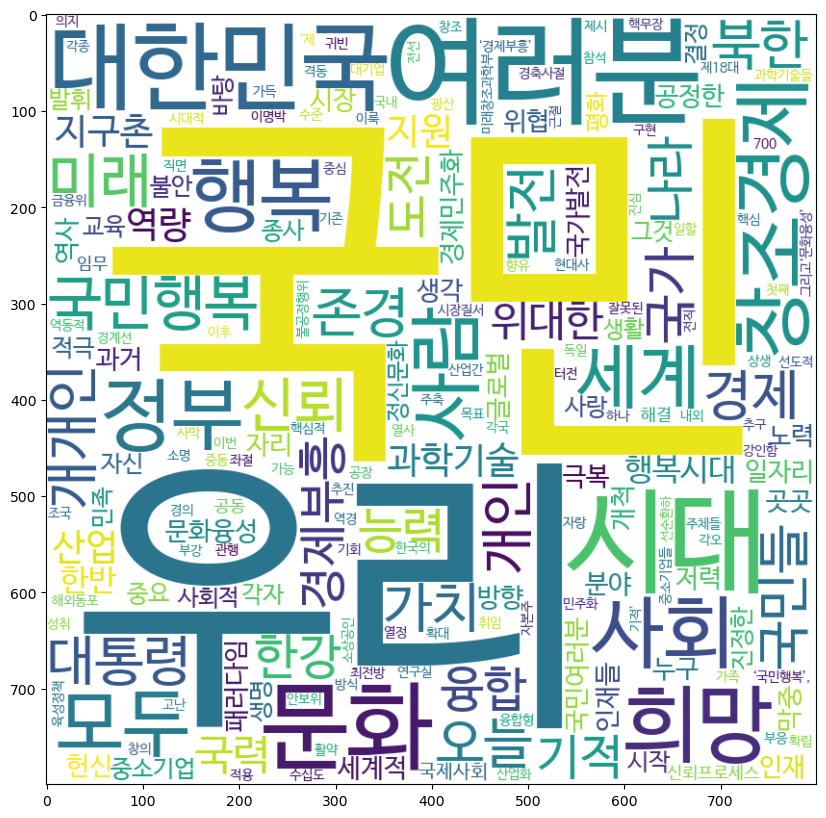

In [137]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_park.png')

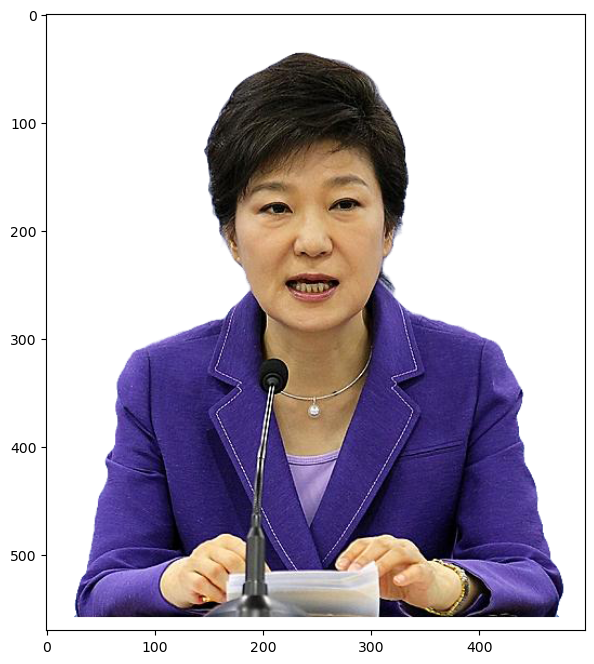

In [138]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

park_mask=np.array(Image.open("박근혜이미지.png"))

plt.figure(figsize=(8,8))
plt.imshow(park_mask,interpolation="bilinear")
plt.show()

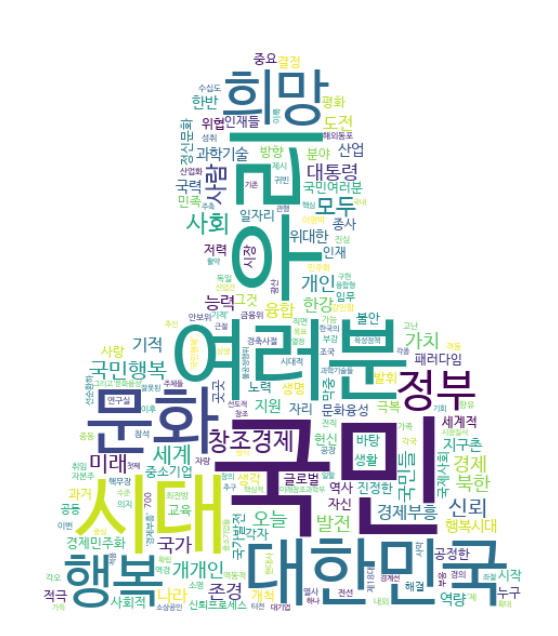

In [140]:
count = Counter(word_list)

wc_park = WordCloud(
    font_path = font_path,
    mask=moon_mask,
    background_color="white"
)
wc_park = wc_moon.generate_from_frequencies(count)

plt.figure(figsize=(8,8))
plt.imshow(wc_park,interpolation="bilinear")
plt.axis("off")
plt.show()

---

# 네이버 영화 리뷰 데이터에 대한 이해와 전처리

In [180]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [181]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')
type(train_data)

pandas.core.frame.DataFrame

In [182]:
len(train_data), len(test_data)

(150000, 50000)

In [183]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [184]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


## 데이터 정제
 * 기계적으로 중복되는 값, 불필요한 값을 제거하는 행위(Data Cleansing, Data Cleaning)

#### 중복 데이터 제거

In [185]:
train_data['document'].nunique(), train_data['label'].nunique()
# # document에 복사 + 붙여넣기하여 완전히 동일한 후기의 수를 알아보기

(146182, 2)

In [186]:
train_data.drop_duplicates(subset = ['document'], inplace = True)

In [187]:
print(f'총 샘플의 수 : {len(train_data)}')

총 샘플의 수 : 146183


### 분류 클래스 정보 확인

<AxesSubplot:>

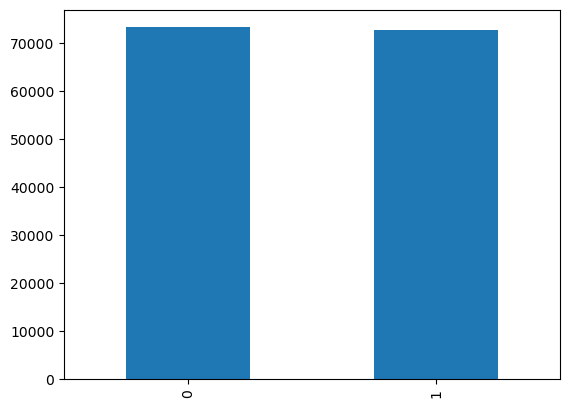

In [188]:
train_data['label'].value_counts().plot(kind='bar')

In [189]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [190]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [191]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [192]:
train_data = train_data.dropna(how = 'any') # nan값이 존재하는 행 제거
print(train_data.isnull().values.any()) # nan값이 존재하는지 확인

False


## 전처리

#### 영어에서 알파벳과 공백을 제외하고 모두 제거하는 예시

In [193]:
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-z ]','', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


#### 한글과 공백을 제외하고 모두 제거

In [194]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')
train_data[:5]

C:\Users\tj\AppData\Local\Temp\ipykernel_12804\2382257982.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


### 내용이 없는 댓글 제거

In [195]:
train_data['document'] = train_data['document'].str.replace('^ +','') # 공백문자를 지우기
train_data['document'].replace('', np.nan, inplace = True)
print(train_data.isnull().sum()) # nan값 세기

id            0
document    789
label         0
dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_12804\1975833947.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +','') # 공백문자를 지우기


In [196]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [197]:
train_data = train_data.dropna(how = 'any') # nan값 버리기
print(len(train_data)) # nan값 버린후 데이터 수 세기

145393


### 테스트 데이터셋 전처리
 * 훈련셋과 동일하게 처리

In [198]:
test_data.drop_duplicates(subset = ['document'], inplace = True) # document 열에서 중복데이터 삭제
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','') # 정규 표현식으로 문자외 데이터 empty값으로
test_data['document'] = test_data['document'].str.replace('^ +','') # 공백을 empty값으로 변경
test_data['document'].replace('', np.nan, inplace = True)  # empty 값을 nan값으로 변경
test_data = test_data.dropna(how = 'any') # nan값 제거
print(f'전처리 후 테스트용 샘플의 개수 : {len(test_data)}')

전처리 후 테스트용 샘플의 개수 : 48852


C:\Users\tj\AppData\Local\Temp\ipykernel_12804\132310415.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','') # 정규 표현식으로 문자외 데이터 empty값으로
C:\Users\tj\AppData\Local\Temp\ipykernel_12804\132310415.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +','') # 공백을 empty값으로 변경


## 토큰화

### 불용어 처리

In [207]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

### 한글 형태소 분석이 Okt적용

In [200]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)
# morphs : 단어만 추출, stem : 어근으로 변환 옵션

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

* 한글의 특성에 맞게 단어별 어근에 따른 정규화

In [208]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem = True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 145393/145393 [10:32<00:00, 230.05it/s]


In [209]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [210]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 48852/48852 [01:36<00:00, 507.13it/s]


In [211]:
print(X_test[:3])

[['굳다', 'ㅋ'], ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]


In [212]:
len(X_train)

145393